<img src="images/Peoplelogy-Logo.png" style="height: 100px;" align=left>

# Capstone Project
#### Designed by:
Uzair Aslam (uzairaslam19@yahoo.com)


## Submission Guideline

- Your jupyter notebook(s)
- PowerPoint Slides
- Presentation, 12 minutes + 3 minutes Q/A

## The Use Case
#### **This a financial Dataset from a bank in Europe, and consists of 8 CSV files. Descriptions of which are as follows. You are provided a data set (in csv format) containing the following data**


**Account (4500 Observations)** - Each record describes static characteristics of an account

**Client (5369 Observations)** - Each record describes characteristics of a client

**Relationship (disp) (5369 Observations)** - Each record relates together a client with an account (*relationship.csv*)

**Order (6471 Observations)** - Each record describes characteristics of a payment order

**Transaction (1056320 Observations)** - Each record describes one transaction on an account

**Loan (682 Observations)** - Each record describes a loan granted for a given account

**Credit card (892 Observations)** - Each record describes a credit card issued to an account

**Demographic data (77 Observations)** - Each record describes demographic characteristics of a district.

### ER Diagram for the Dataset
<table><tr><td><img src="images/ERDagram.png"></td></tr></table>

## PART 1: SQL

### **CONNECT to the Banking_data.db through jupyter or DB Viewer, and answer the following questions.**
- You are required to provide the answer as well as the query that you wrote

### **i.Find the average loan amount in the loan table**

In [2]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [3]:
%sql sqlite:///Banking_data.db

In [4]:
%sql SELECT sql from sqlite_master WHERE type='table';

 * sqlite:///Banking_data.db
Done.


sql
"CREATE TABLE ""account"" (""account_id"" INTEGER, ""district_id"" INTEGER, ""frequency"" TEXT, ""date"" INTEGER)"
"CREATE TABLE ""card"" (""card_id"" INTEGER, ""disp_id"" INTEGER, ""type"" TEXT, ""issued"" TEXT)"
"CREATE TABLE ""client"" (""client_id"" INTEGER, ""birth_number"" INTEGER, ""district_id"" INTEGER)"
"CREATE TABLE ""district"" (""A1"" INTEGER, ""A2"" TEXT, ""A3"" TEXT, ""A4"" INTEGER, ""A5"" INTEGER, ""A6"" INTEGER, ""A7"" INTEGER, ""A8"" INTEGER, ""A9"" INTEGER, ""A10"" REAL, ""A11"" INTEGER, ""A12"" TEXT, ""A13"" REAL, ""A14"" INTEGER, ""A15"" TEXT, ""A16"" INTEGER)"
"CREATE TABLE ""loan"" (""loan_id"" INTEGER, ""account_id"" INTEGER, ""date"" INTEGER, ""amount"" INTEGER, ""duration"" INTEGER, ""payments"" REAL, ""status"" TEXT)"
"CREATE TABLE ""orders"" (""order_id"" INTEGER, ""account_id"" INTEGER, ""bank_to"" TEXT, ""account_to"" INTEGER, ""amount"" REAL, ""k_symbol"" TEXT)"
"CREATE TABLE ""relationship"" (""disp_id"" INTEGER, ""client_id"" INTEGER, ""account_id"" INTEGER, ""type"" TEXT)"
"CREATE TABLE ""transactions"" (""trans_id"" INTEGER, ""account_id"" INTEGER, ""date"" INTEGER, ""type"" TEXT, ""operation"" TEXT, ""amount"" REAL, ""balance"" REAL, ""k_symbol"" TEXT, ""bank"" TEXT, ""account"" REAL)"


In [38]:

%%sql
SELECT AVG(amount)
FROM loan

 * sqlite:///Banking_data.db
Done.


AVG(amount)
151410.1759530792


### **ii. What is the total number of accounts in the account table?**

In [5]:
%%sql
SELECT COUNT(account_id)
FROM account

 * sqlite:///Banking_data.db
Done.


COUNT(account_id)
4500


### **iii. Find all clients who have a loan but no credit card.**
#### **Part A: Fetch the list of all clients who have a loan but no credit card.**
#### **Part B: Count the number of clients who meet this condition.**

In [6]:
%%sql
SELECT *
FROM loan
LIMIT 1

 * sqlite:///Banking_data.db
Done.


loan_id,account_id,date,amount,duration,payments,status
5314,1787,930705,96396,12,8033.0,B


In [14]:
%%sql
SELECT 
L.account_id, 
R.account_id,
R.disp_id,
C.disp_id
FROM loan AS L
INNER JOIN 
    relationship AS R ON R.account_id = L.account_id
LEFT JOIN 
    card AS C ON C.disp_id = R.disp_id
WHERE C.disp_id IS NULL
LIMIT 10;

 * sqlite:///Banking_data.db
Done.


account_id,account_id_1,disp_id,disp_id_1
1787,1787,2166,None
1801,1801,2181,None
9188,9188,11006,None
8261,8261,9892,None
8261,8261,9893,None
11265,11265,13537,None
5428,5428,6551,None
10973,10973,13182,None
10364,10364,12446,None
10364,10364,12447,None


In [15]:
%%sql
SELECT 
 COUNT(DISTINCT R.disp_id) AS count_client
FROM loan AS L
INNER JOIN 
    relationship AS R ON R.account_id = L.account_id
LEFT JOIN 
    card AS C ON C.disp_id = R.disp_id
WHERE C.disp_id IS NULL;


 * sqlite:///Banking_data.db
Done.


count_client
657


### **iv. Find the total loan amount issued for each district.**
#### **Part A: Display the total loan amount issued for each district.**
#### **Part B: Count how many districts have a total loan amount greater than a  1,000,000.**

In [18]:
%%sql
SELECT Acc.district_id,SUM(L.amount) AS Total_loan
FROM loan AS L
INNER JOIN account AS Acc ON L.account_id = Acc.account_id
GROUP BY district_id
ORDER BY Acc.district_id;


 * sqlite:///Banking_data.db
Done.


district_id,Total_loan
1,12932412
2,887952
3,1460796
4,1106520
5,1901160
6,2095980
7,557796
8,617520
9,1005084
10,859464


In [27]:
%%sql
SELECT Acc.district_id, SUM(L.amount) AS Total_loan
FROM loan AS L
INNER JOIN account AS Acc ON L.account_id = Acc.account_id
GROUP BY Acc.district_id
HAVING SUM(L.amount) > 1000000
ORDER BY Acc.district_id;


 * sqlite:///Banking_data.db
Done.


district_id,Total_loan
1,12932412
3,1460796
4,1106520
5,1901160
6,2095980
9,1005084
11,1233096
12,1299192
14,2010924
16,1339572


#### **v. Fetch the top 5 clients with the highest loan payments.**


In [31]:

%%sql
SELECT payments
FROM loan 
ORDER BY payments DESC
LIMIT 5

 * sqlite:///Banking_data.db
Done.


payments
9910.0
9847.0
9736.0
9721.0
9698.0


#### **vi. List the districts where more than 100 accounts have been opened.**

In [37]:
%%sql
SELECT COUNT(DISTINCT account_id) AS Count_acc, district_id
FROM account
GROUP BY district_id
HAVING COUNT(DISTINCT account_id) > 100;


 * sqlite:///Banking_data.db
Done.


Count_acc,district_id
554,1
128,54
152,70
135,74


#### **vii. Count of all transactions where the transaction amount is above the average transaction amount for that account.**

In [42]:
%%sql
SELECT AVG(amount) 
FROM transactions


 * sqlite:///Banking_data.db
Done.


AVG(amount)
5924.145675836868


In [51]:
%%sql
SELECT COUNT(T.amount) AS Count_Trans
FROM transactions AS T
WHERE T.amount > (SELECT AVG(amount) FROM transactions);


 * sqlite:///Banking_data.db
Done.


Count_Trans
297057


#### **viii. Find the total loan amount per district.**
#### **Part A: Display the total loan amount issued per district.**
#### **Part B: Count the number of districts where the total loan amount is above 500,000.**



In [52]:
%%sql
SELECT Acc.district_id, SUM(L.amount) AS Total_loan
FROM loan AS L
INNER JOIN account AS Acc ON L.account_id = Acc.account_id
GROUP BY Acc.district_id
ORDER BY Acc.district_id
LIMIT 10

 * sqlite:///Banking_data.db
Done.


district_id,Total_loan
1,12932412
2,887952
3,1460796
4,1106520
5,1901160
6,2095980
7,557796
8,617520
9,1005084
10,859464


In [59]:
%%sql
SELECT COUNT(Acc.district_id) AS Count_Districts, Acc.district_id
FROM loan AS L
INNER JOIN account AS Acc ON L.account_id = Acc.account_id
GROUP BY Acc.district_id
HAVING SUM(L.amount) > 500000;


 * sqlite:///Banking_data.db
Done.


Count_Districts,district_id
84,1
6,2
6,3
7,4
10,5
9,6
6,7
5,8
9,9
5,10


### **ix. Find all clients who own multiple accounts.**

In [68]:
%%sql
SELECT COUNT(DISTINCT account_id) AS Count_acc, C.district_id
FROM client AS C
INNER JOIN account AS A ON C.district_id = A.district_id
GROUP BY C.district_id
HAVING COUNT(DISTINCT A.account_id) > 1;

 * sqlite:///Banking_data.db
Done.


Count_acc,district_id
554,1
42,2
50,3
48,4
65,5
48,6
44,7
56,8
46,9
48,10


#### **x. List all credit card types available in the system.**

In [75]:
%%sql
SELECT type 
FROM card 
GROUP BY type

 * sqlite:///Banking_data.db
Done.


type
classic
gold
junior


## PART 2. PYTHON - Conduct exploratory data analysis to answer the following questions:

**Hint:**
- Use Pandas to solve these questions (not mandatory but preferable).
- This part also requires you to plot where necessary.
- You can load the data to Pandas Dataframes directly from the DB with the code as below
```
import sqlite3
import pandas as pd

# Step 1: Connect to the SQLite Database
db_path = 'path_to_your_database.db'  # Replace with the actual path to your database
conn = sqlite3.connect(db_path)

# Step 2: Load Data from Database Tables into Pandas DataFrames
# Example: Loading the 'client' table
client_df = pd.read_sql_query("SELECT * FROM client", conn)


# Step 3: Close the database connection after loading the data
conn.close()
```

**Incase you get DB error, then please feel free to directly load the csv files provided. Please Note that you have to load all the csv files, as you need all of them to answer the questions below.**

### a. Clients
#### i. Which Districts have the highest number of customers? Try to visualize your Answer using seaborn

	Hints:

	1.	Hint 1:
You need to join the client table with the account table using the common column account_id. After that, you can group by district_id to count how many customers are in each district.
	•	Tip: Use pd.merge() to combine the DataFrames and groupby() to aggregate the data.

	2.	Hint 2:
To visualize, you can use a bar plot with district_id on the x-axis and the count of customers on the y-axis. Seaborn’s barplot() is ideal for this.
	•	Tip: Use Seaborn’s sns.barplot() function for the visualization.

In [13]:
#Your Code Here

import sqlite3
import pandas as pd
pd.set_option('display.max_colwidth', None)
conn = sqlite3.connect('Banking_data.db')
df = pd.read_sql_query("SELECT * FROM client", conn)
df.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


   district_id  customers
0            1        663
1           74        180
2           70        169
3           54        155
4           64        109


C:\Users\USER\AppData\Local\Temp\ipykernel_7400\1228371512.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='district_id', y='customers', palette='viridis')


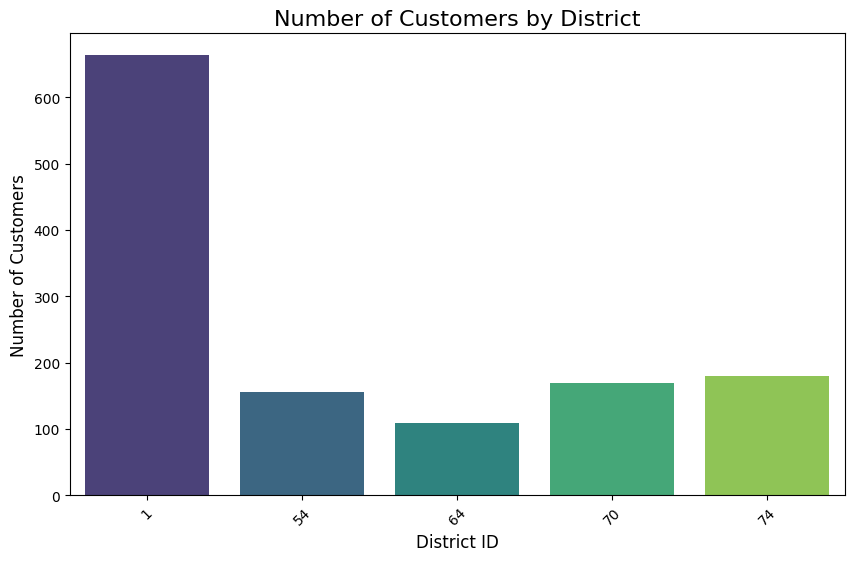

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
conn = sqlite3.connect('Banking_data.db')

# Execute the query
query = '''
SELECT 
    A.district_id,
    COUNT(DISTINCT C.client_id) AS customers
FROM 
    client AS C
INNER JOIN 
   account AS A ON C.district_id= A.district_id
GROUP BY 
    A.district_id
ORDER BY 
    customers DESC
    
    LIMIT 5;
'''

df = pd.read_sql_query(query, conn)

# Display the top districts with the most customers
print(df)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='district_id', y='customers', palette='viridis')
plt.title('Number of Customers by District', fontsize=16)
plt.xlabel('District ID', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### ii. Which district have shown a significant decline in the monthly number of accounts opened?

	Hints:

	1.	Hint 1:
Start by extracting the month and year from the date column in the account table. Then group by district_id and month/year to calculate the number of accounts opened per district each month.

	•	Tip: Use pd.to_datetime() to convert the date and .dt.to_period('M') to extract the year and month.

	2.	Hint 2:
To detect a significant decline, calculate the percentage change in the number of accounts opened for each district month-over-month. Focus on identifying districts with large negative changes.

	•	Tip: Use groupby() and pct_change() to find the percentage change in account openings.


In [6]:
conn = sqlite3.connect('Banking_data.db')

# Load the account data
account = pd.read_sql_query("SELECT * FROM account", conn)
account

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102
...,...,...,...,...
4495,124,55,POPLATEK MESICNE,971228
4496,3958,59,POPLATEK MESICNE,971228
4497,777,30,POPLATEK MESICNE,971228
4498,1573,63,POPLATEK MESICNE,971229


In [8]:
#convert date and extract the year and month
account['date'] = pd.to_datetime(account['date']) 
account['month_year'] = account['date'].dt.to_period('M')
account

,account_id,district_id,frequency,date,month_year
0,576,55,POPLATEK MESICNE,1970-01-01 00:00:00.000930101,1970-01
1,3818,74,POPLATEK MESICNE,1970-01-01 00:00:00.000930101,1970-01
2,704,55,POPLATEK MESICNE,1970-01-01 00:00:00.000930101,1970-01
3,2378,16,POPLATEK MESICNE,1970-01-01 00:00:00.000930101,1970-01
4,2632,24,POPLATEK MESICNE,1970-01-01 00:00:00.000930102,1970-01
...,...,...,...,...,...
4495,124,55,POPLATEK MESICNE,1970-01-01 00:00:00.000971228,1970-01
4496,3958,59,POPLATEK MESICNE,1970-01-01 00:00:00.000971228,1970-01
4497,777,30,POPLATEK MESICNE,1970-01-01 00:00:00.000971228,1970-01
4498,1573,63,POPLATEK MESICNE,1970-01-01 00:00:00.000971229,1970-01


In [9]:
#Group by district_id and month/year to count accounts
monthly_acc = account.groupby(['district_id', 'month_year']).size().reset_index(name='num_accounts')
monthly_acc

,district_id,month_year,num_accounts
0,1,1970-01,554
1,2,1970-01,42
2,3,1970-01,50
3,4,1970-01,48
4,5,1970-01,65
...,...,...,...
72,73,1970-01,56
73,74,1970-01,135
74,75,1970-01,51
75,76,1970-01,55


In [10]:
#Calculate the percentage change

monthly_acc['pct_change'] = monthly_acc.groupby('district_id')['num_accounts'].pct_change()
monthly_acc

,district_id,month_year,num_accounts,pct_change
0,1,1970-01,554,NaN
1,2,1970-01,42,NaN
2,3,1970-01,50,NaN
3,4,1970-01,48,NaN
4,5,1970-01,65,NaN
...,...,...,...,...
72,73,1970-01,56,NaN
73,74,1970-01,135,NaN
74,75,1970-01,51,NaN
75,76,1970-01,55,NaN


#### iii. How many of our clients are men/women?

	Hints:

	•	Females have +50 added to their Month in Date of birth,so whereas a normal month will be 01-12,
		females may have 51-62
	•	Its better to create a new column Named Gender.
	•	Try to utilize .str[] method and extract the Month part of the date.


In [17]:
conn = sqlite3.connect('Banking_data.db')

client= pd.read_sql_query("SELECT * FROM client", conn)
client

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5
...,...,...,...
5364,13955,456030,1
5365,13956,430406,1
5366,13968,680413,61
5367,13971,626019,67


In [21]:
# Create the Gender column
client['Gender'] = client['birth_number'].apply(lambda x: 'Female' if x > 500000 else 'Male')
client['Gender']

0       Female
1         Male
2         Male
3       Female
4       Female
         ...  
5364      Male
5365      Male
5366    Female
5367    Female
5368    Female
Name: Gender, Length: 5369, dtype: object

In [22]:

# Count the number of males and females
gender_counts = client['Gender'].value_counts()

print(gender_counts)

Gender
Female    3123
Male      2246
Name: count, dtype: int64


#### iv. In the client DataFrame, check if the birthdate column is in the correct format (YYYY-MM-DD). If not, convert it to the correct datetime format.

	•	Hint: Use pd.to_datetime() to ensure the column is in datetime format.
	•	Females have +50 added to their Month in Date of birth. You may need to handle this beforehand

In [65]:
#Your Code Here
conn = sqlite3.connect('Banking_data.db')

# Execute the query
query= '''
SELECT 
    CASE 
        WHEN birth_number > 500000 THEN birth_number - 500000
        ELSE birth_number
    END AS adjusted_birth_number
FROM 
    client
;
'''
df = pd.read_sql_query(query, conn)
df

,adjusted_birth_number
0,206213
1,450204
2,406009
3,61201
4,105703
...,...
5364,456030
5365,430406
5366,180413
5367,126019


In [66]:
df['adjusted_birth_number'] = pd.to_datetime(df['adjusted_birth_number']) 
df['adjusted_birth_number']

0      1970-01-01 00:00:00.000206213
1      1970-01-01 00:00:00.000450204
2      1970-01-01 00:00:00.000406009
3      1970-01-01 00:00:00.000061201
4      1970-01-01 00:00:00.000105703
                    ...             
5364   1970-01-01 00:00:00.000456030
5365   1970-01-01 00:00:00.000430406
5366   1970-01-01 00:00:00.000180413
5367   1970-01-01 00:00:00.000126019
5368   1970-01-01 00:00:00.000035812
Name: adjusted_birth_number, Length: 5369, dtype: datetime64[ns]

####  v. Calculate the age of each client and add it as a new column in the client_df DataFrame. Use the birth_number column to determine the birth year, month, and day. Then, calculate the age based on the current year.
    •   	Hints:
	•	The birth_number field is in the format YYMMDD, where:
	•	YY is the last two digits of the year.
	•	MM is the month of birth (note: for women, 50 is added to the month).
	•	DD is the day of birth.

	•	Steps:
	1.	Extract the year, month, and day from the birth_number column.
	2.	Handle cases where MM is greater than 50 (i.e., for women).
	3.	Convert the extracted birth date into a datetime object.
	4.	Subtract the birth year from the current year to calculate age.


In [67]:
df['Dates'] = pd.to_datetime(df['adjusted_birth_number']).dt.date
df['Time'] = pd.to_datetime(df['adjusted_birth_number']).dt.time
df

,adjusted_birth_number,Dates,Time
0,1970-01-01 00:00:00.000206213,1970-01-01,00:00:00.000206
1,1970-01-01 00:00:00.000450204,1970-01-01,00:00:00.000450
2,1970-01-01 00:00:00.000406009,1970-01-01,00:00:00.000406
3,1970-01-01 00:00:00.000061201,1970-01-01,00:00:00.000061
4,1970-01-01 00:00:00.000105703,1970-01-01,00:00:00.000105
...,...,...,...
5364,1970-01-01 00:00:00.000456030,1970-01-01,00:00:00.000456
5365,1970-01-01 00:00:00.000430406,1970-01-01,00:00:00.000430
5366,1970-01-01 00:00:00.000180413,1970-01-01,00:00:00.000180
5367,1970-01-01 00:00:00.000126019,1970-01-01,00:00:00.000126


In [68]:
df['year'] = pd.to_datetime(df['Dates']).dt.year
df['month'] = pd.to_datetime(df['Dates']).dt.month
df

,adjusted_birth_number,Dates,Time,year,month
0,1970-01-01 00:00:00.000206213,1970-01-01,00:00:00.000206,1970,1
1,1970-01-01 00:00:00.000450204,1970-01-01,00:00:00.000450,1970,1
2,1970-01-01 00:00:00.000406009,1970-01-01,00:00:00.000406,1970,1
3,1970-01-01 00:00:00.000061201,1970-01-01,00:00:00.000061,1970,1
4,1970-01-01 00:00:00.000105703,1970-01-01,00:00:00.000105,1970,1
...,...,...,...,...,...
5364,1970-01-01 00:00:00.000456030,1970-01-01,00:00:00.000456,1970,1
5365,1970-01-01 00:00:00.000430406,1970-01-01,00:00:00.000430,1970,1
5366,1970-01-01 00:00:00.000180413,1970-01-01,00:00:00.000180,1970,1
5367,1970-01-01 00:00:00.000126019,1970-01-01,00:00:00.000126,1970,1


In [74]:
df['Age_cust'] = df['year'].apply(lambda x: 2024 - x)
df

,adjusted_birth_number,Dates,Time,year,month,Age_cust
0,1970-01-01 00:00:00.000206213,1970-01-01,00:00:00.000206,1970,1,54
1,1970-01-01 00:00:00.000450204,1970-01-01,00:00:00.000450,1970,1,54
2,1970-01-01 00:00:00.000406009,1970-01-01,00:00:00.000406,1970,1,54
3,1970-01-01 00:00:00.000061201,1970-01-01,00:00:00.000061,1970,1,54
4,1970-01-01 00:00:00.000105703,1970-01-01,00:00:00.000105,1970,1,54
...,...,...,...,...,...,...
5364,1970-01-01 00:00:00.000456030,1970-01-01,00:00:00.000456,1970,1,54
5365,1970-01-01 00:00:00.000430406,1970-01-01,00:00:00.000430,1970,1,54
5366,1970-01-01 00:00:00.000180413,1970-01-01,00:00:00.000180,1970,1,54
5367,1970-01-01 00:00:00.000126019,1970-01-01,00:00:00.000126,1970,1,54


### b. Credit Cards


#### i. Which card types are popular among the various client categories (gender/age group/region)?
      Hints:
- You can read the query in pandas and plot for ease

In [100]:
#Your Code Here
conn = sqlite3.connect('Banking_data.db')

# Load the account data
card = pd.read_sql_query("SELECT * FROM card", conn)
card

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00
...,...,...,...,...
887,125,694,gold,981226 00:00:00
888,674,4360,classic,981228 00:00:00
889,322,2063,classic,981228 00:00:00
890,685,4467,classic,981229 00:00:00


In [94]:
conn = sqlite3.connect('Banking_data.db')
query ='''
SELECT 
A.account_id, 
R.account_id,
R.disp_id,
C.disp_id,
C.type,
A.district_id,
COUNT(DISTINCT C.type) AS card_ty
FROM account AS A
INNER JOIN 
    relationship AS R ON R.account_id = A.account_id
INNER JOIN 
    card AS C ON C.disp_id = R.disp_id

GROUP BY A.district_id 
ORDER BY card_ty DESC
'''
df = pd.read_sql_query(query, conn)
df

#in region number 76 have most popular gold type card 

,account_id,account_id,disp_id,disp_id,type,district_id,card_ty
0,1695,1695,2058,2058,gold,76,3
1,2189,2189,2650,2650,junior,75,3
2,7753,7753,9285,9285,classic,74,3
3,2779,2779,3356,3356,classic,73,3
4,1944,1944,2363,2363,classic,72,3
...,...,...,...,...,...,...,...
72,10079,10079,12088,12088,classic,62,1
73,10738,10738,12893,12893,classic,45,1
74,277,277,334,334,classic,32,1
75,348,348,425,425,classic,25,1


#### ii. What is the trend of card issuance at the various branches?

	Hints:
You can analyze the issuance dates from the card table. First, ensure that the issued column (which stores the issuance date) is converted to a datetime format.

	•	Tip: Use pd.to_datetime() to convert the issued column to a datetime format.
    
After you have processed the issuance dates, group by the branch (district_id) and the issuance period (month or year) to observe the trend of card issuance over time at different branches.

	•	Tip: Use groupby() on district_id and the issuance date (grouped by month or year), and then visualize using Seaborn to observe trends.

In [102]:
card['issued'] = pd.to_datetime(card['issued']) 
card['issued']

C:\Users\USER\AppData\Local\Temp\ipykernel_9676\30239585.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  card['issued'] = pd.to_datetime(card['issued'])


0     1993-11-07
1     1994-01-19
2     1994-02-05
3     1994-02-08
4     1994-02-15
         ...    
887   1998-12-26
888   1998-12-28
889   1998-12-28
890   1998-12-29
891   1998-12-29
Name: issued, Length: 892, dtype: datetime64[ns]

In [104]:
card['year'] = pd.to_datetime(card['Dates']).dt.year
card['month'] = pd.to_datetime(card['Dates']).dt.month
card

,card_id,disp_id,type,issued,Dates,Time,year,month
0,1005,9285,classic,1993-11-07,1993-11-07,00:00:00,1993,11
1,104,588,classic,1994-01-19,1994-01-19,00:00:00,1994,1
2,747,4915,classic,1994-02-05,1994-02-05,00:00:00,1994,2
3,70,439,classic,1994-02-08,1994-02-08,00:00:00,1994,2
4,577,3687,classic,1994-02-15,1994-02-15,00:00:00,1994,2
...,...,...,...,...,...,...,...,...
887,125,694,gold,1998-12-26,1998-12-26,00:00:00,1998,12
888,674,4360,classic,1998-12-28,1998-12-28,00:00:00,1998,12
889,322,2063,classic,1998-12-28,1998-12-28,00:00:00,1998,12
890,685,4467,classic,1998-12-29,1998-12-29,00:00:00,1998,12


In [107]:
card_year = card.groupby(['year']).size().reset_index(name='count')
card_year 

,year,count
0,1993,1
1,1994,21
2,1995,63
3,1996,116
4,1997,242
5,1998,449


C:\Users\USER\AppData\Local\Temp\ipykernel_9676\319648302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=card_year, x='year', y='count', palette='viridis')


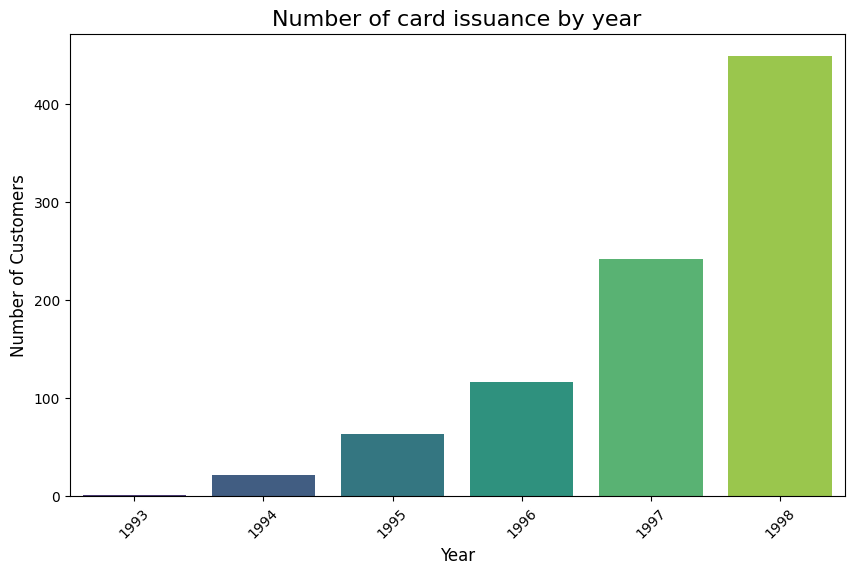

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(data=card_year, x='year', y='count', palette='viridis')
plt.title('Number of card issuance by year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [125]:
conn = sqlite3.connect('Banking_data.db')

# Load the account data
district = pd.read_sql_query("SELECT * FROM district", conn)
district

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


In [126]:
dis_group = district.groupby(['A3']).size().reset_index(name='count')
dis_group  

,A3,count
0,Prague,1
1,central Bohemia,12
2,east Bohemia,11
3,north Bohemia,10
4,north Moravia,11
5,south Bohemia,8
6,south Moravia,14
7,west Bohemia,10


C:\Users\USER\AppData\Local\Temp\ipykernel_9676\1932224533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dis_group  , x='A3', y='count', palette='viridis')


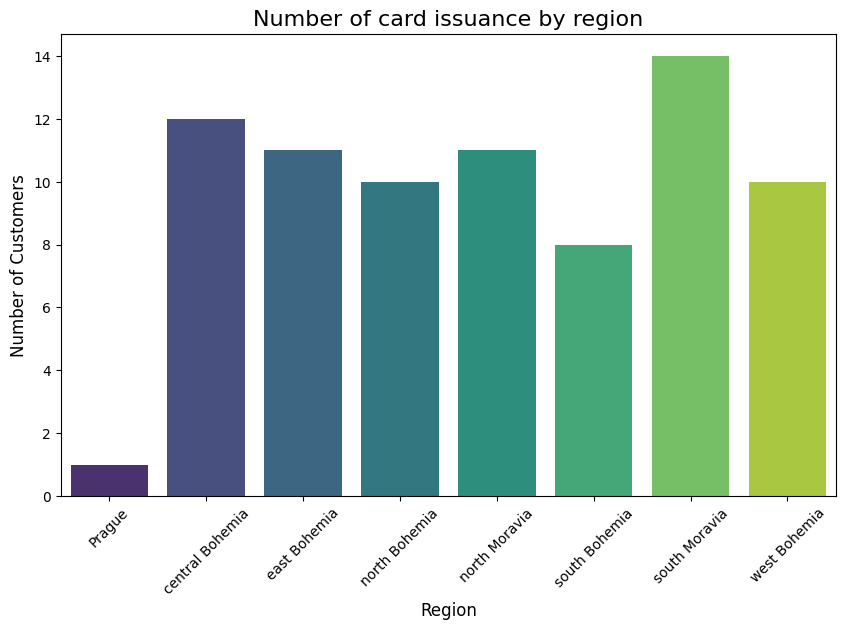

In [128]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dis_group  , x='A3', y='count', palette='viridis')
plt.title('Number of card issuance by region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### c. Loans


#### i. What is the distribution of loan quantum given out by the bank?

	Hints:
You can use a bar chart or histogram to plot the distribution


In [113]:
conn = sqlite3.connect('Banking_data.db')

# Load the account data
loan = pd.read_sql_query("SELECT * FROM loan", conn)
loan

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A
...,...,...,...,...,...,...,...
677,4989,105,981205,352704,48,7348.0,C
678,5221,1284,981205,52512,12,4376.0,C
679,6402,6922,981206,139488,24,5812.0,C
680,5346,1928,981206,55632,24,2318.0,C


In [117]:
loan['date'] = pd.to_datetime(loan['date']) 
loan['date']

0     1970-01-01 00:00:00.000930705
1     1970-01-01 00:00:00.000930711
2     1970-01-01 00:00:00.000930728
3     1970-01-01 00:00:00.000930803
4     1970-01-01 00:00:00.000930906
                   ...             
677   1970-01-01 00:00:00.000981205
678   1970-01-01 00:00:00.000981205
679   1970-01-01 00:00:00.000981206
680   1970-01-01 00:00:00.000981206
681   1970-01-01 00:00:00.000981208
Name: date, Length: 682, dtype: datetime64[ns]

In [118]:
loan['Dates'] = pd.to_datetime(loan['date']).dt.date
loan['Time'] = pd.to_datetime(loan['date']).dt.time
loan

,loan_id,account_id,date,amount,duration,payments,status,issued,Dates,Time
0,5314,1787,1970-01-01 00:00:00.000930705,96396,12,8033.0,B,1970-01-01 00:00:00.000930705,1970-01-01,00:00:00.000930
1,5316,1801,1970-01-01 00:00:00.000930711,165960,36,4610.0,A,1970-01-01 00:00:00.000930711,1970-01-01,00:00:00.000930
2,6863,9188,1970-01-01 00:00:00.000930728,127080,60,2118.0,A,1970-01-01 00:00:00.000930728,1970-01-01,00:00:00.000930
3,5325,1843,1970-01-01 00:00:00.000930803,105804,36,2939.0,A,1970-01-01 00:00:00.000930803,1970-01-01,00:00:00.000930
4,7240,11013,1970-01-01 00:00:00.000930906,274740,60,4579.0,A,1970-01-01 00:00:00.000930906,1970-01-01,00:00:00.000930
...,...,...,...,...,...,...,...,...,...,...
677,4989,105,1970-01-01 00:00:00.000981205,352704,48,7348.0,C,1970-01-01 00:00:00.000981205,1970-01-01,00:00:00.000981
678,5221,1284,1970-01-01 00:00:00.000981205,52512,12,4376.0,C,1970-01-01 00:00:00.000981205,1970-01-01,00:00:00.000981
679,6402,6922,1970-01-01 00:00:00.000981206,139488,24,5812.0,C,1970-01-01 00:00:00.000981206,1970-01-01,00:00:00.000981
680,5346,1928,1970-01-01 00:00:00.000981206,55632,24,2318.0,C,1970-01-01 00:00:00.000981206,1970-01-01,00:00:00.000981


In [119]:
loan['year'] = pd.to_datetime(loan['Dates']).dt.year
loan['month'] = pd.to_datetime(loan['Dates']).dt.month
loan

,loan_id,account_id,date,amount,duration,payments,status,issued,Dates,Time,year,month
0,5314,1787,1970-01-01 00:00:00.000930705,96396,12,8033.0,B,1970-01-01 00:00:00.000930705,1970-01-01,00:00:00.000930,1970,1
1,5316,1801,1970-01-01 00:00:00.000930711,165960,36,4610.0,A,1970-01-01 00:00:00.000930711,1970-01-01,00:00:00.000930,1970,1
2,6863,9188,1970-01-01 00:00:00.000930728,127080,60,2118.0,A,1970-01-01 00:00:00.000930728,1970-01-01,00:00:00.000930,1970,1
3,5325,1843,1970-01-01 00:00:00.000930803,105804,36,2939.0,A,1970-01-01 00:00:00.000930803,1970-01-01,00:00:00.000930,1970,1
4,7240,11013,1970-01-01 00:00:00.000930906,274740,60,4579.0,A,1970-01-01 00:00:00.000930906,1970-01-01,00:00:00.000930,1970,1
...,...,...,...,...,...,...,...,...,...,...,...,...
677,4989,105,1970-01-01 00:00:00.000981205,352704,48,7348.0,C,1970-01-01 00:00:00.000981205,1970-01-01,00:00:00.000981,1970,1
678,5221,1284,1970-01-01 00:00:00.000981205,52512,12,4376.0,C,1970-01-01 00:00:00.000981205,1970-01-01,00:00:00.000981,1970,1
679,6402,6922,1970-01-01 00:00:00.000981206,139488,24,5812.0,C,1970-01-01 00:00:00.000981206,1970-01-01,00:00:00.000981,1970,1
680,5346,1928,1970-01-01 00:00:00.000981206,55632,24,2318.0,C,1970-01-01 00:00:00.000981206,1970-01-01,00:00:00.000981,1970,1


C:\Users\USER\AppData\Local\Temp\ipykernel_7400\4063101390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loan, x='duration', y='amount', palette='viridis')


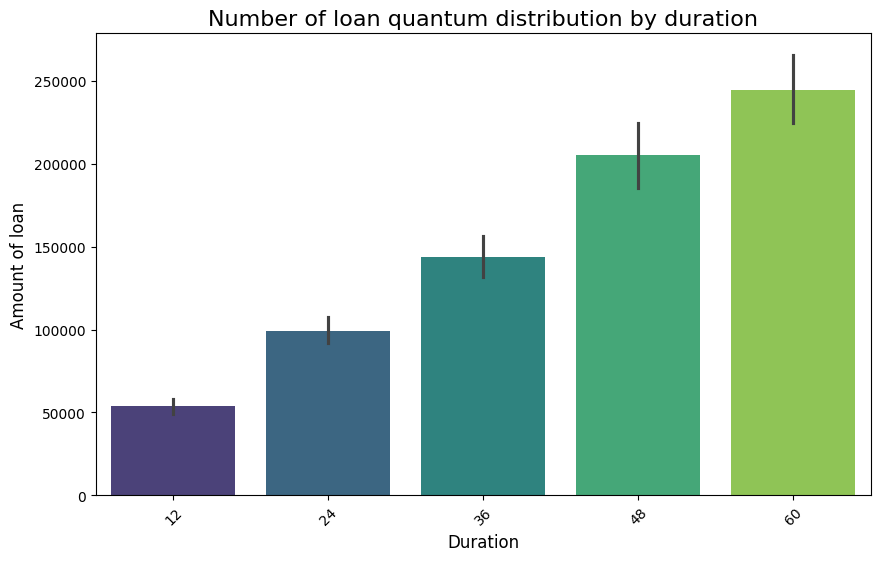

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loan, x='duration', y='amount', palette='viridis')
plt.title('Number of loan quantum distribution by duration', fontsize=16)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Amount of loan', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### ii. What is the relation between loan quantum and average salary?

	Hint:
You can utilize a scatter plot to plot the relationship. Make sure both variables are of the correct type.


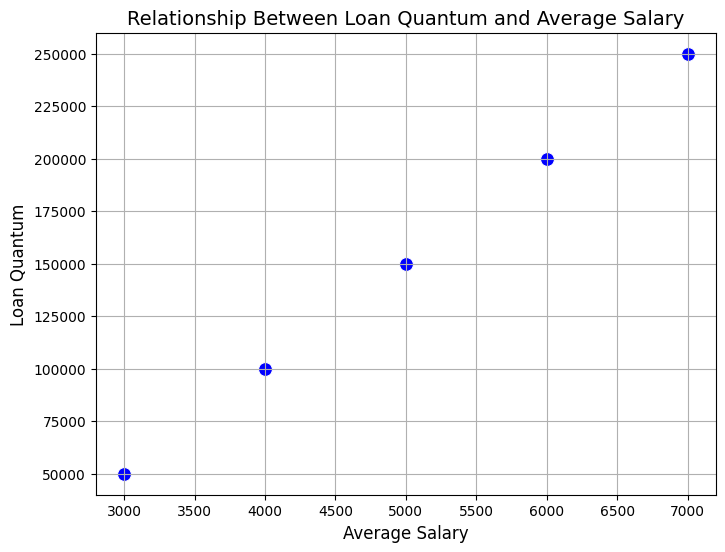

In [129]:
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'average_salary': [3000, 4000, 5000, 6000, 7000],
    'loan_quantum': [50000, 100000, 150000, 200000, 250000]
}
df = pd.DataFrame(data)

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='average_salary', y='loan_quantum', color='blue', s=100)

# Add labels and title
plt.title('Relationship Between Loan Quantum and Average Salary', fontsize=14)
plt.xlabel('Average Salary', fontsize=12)
plt.ylabel('Loan Quantum', fontsize=12)
plt.grid(True)
plt.show()


#### iii. Examine the relationship between the number of loans in arrears and the unemployment rate at the time.

	Hints:

	1.	Hint 1:
Filter the loan table for loans in arrears (e.g., status ‘B’ for overdue).

	•	Tip: Use .loc[] to filter by loan status
	2.	Hint 2:
Merge the loan table with the district table to get the unemployment rate by district.

	•	Tip: Use pd.merge() on district_id.
	3.	Hint 3:
Compare the number of loans in arrears per district with the unemployment rate using a scatter plot.

	•	Tip: Use sns.scatterplot() to visualize the relationship.

In [131]:
loan_status= loan.groupby(['status']).size().reset_index(name='count')
loan_status  

,status,count
0,A,203
1,B,31
2,C,403
3,D,45


In [146]:
conn = sqlite3.connect('Banking_data.db')
query ='''
SELECT 
*
FROM loan
JOIN district 

'''
df = pd.read_sql_query(query, conn)
df


,loan_id,account_id,date,amount,duration,payments,status,A1,A2,A3,...,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,5314,1787,930705,96396,12,8033.0,B,1,Hl.m. Praha,Prague,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,5314,1787,930705,96396,12,8033.0,B,2,Benesov,central Bohemia,...,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,5314,1787,930705,96396,12,8033.0,B,3,Beroun,central Bohemia,...,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,5314,1787,930705,96396,12,8033.0,B,4,Kladno,central Bohemia,...,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5314,1787,930705,96396,12,8033.0,B,5,Kolin,central Bohemia,...,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52509,6748,8645,981208,240900,60,4015.0,C,73,Opava,north Moravia,...,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
52510,6748,8645,981208,240900,60,4015.0,C,74,Ostrava - mesto,north Moravia,...,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
52511,6748,8645,981208,240900,60,4015.0,C,75,Prerov,north Moravia,...,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
52512,6748,8645,981208,240900,60,4015.0,C,76,Sumperk,north Moravia,...,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


In [ ]:
#No found any relation to Compare the number of loans in arrears per district with the unemployment rate.

#### iv. In the loan DataFrame, check for outliers in the amount column.
#### Remove or treat the outliers based on the interquartile range (IQR) method (outliers are values that are 1.5 times the IQR above the third quartile or below the first quartile).

	•	Hint: Use .quantile() to calculate the IQR and .loc[] to filter outliers.

In [147]:
conn = sqlite3.connect('Banking_data.db')

loan = pd.read_sql_query("SELECT * FROM loan", conn)
loan

# Step 1: Calculate the IQR
Q1 = loan['amount'].quantile(0.25)  # First quartile (25th percentile)
Q3 = loan['amount'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                       # Interquartile range

# Step 2: Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = loan.loc[(loan['amount'] < lower_bound) | (loan['amount'] > upper_bound)]

# Step 4: Remove outliers
loan_without_outliers = loan.loc[(loan['amount'] >= lower_bound) & (loan['amount'] <= upper_bound)]

# Step 5: Print results
print("Original DataFrame:")
print(loan)
print("\nOutliers:")
print(outliers)
print("\nDataFrame without Outliers:")
print(loan_without_outliers)


Original DataFrame:
     loan_id  account_id    date  amount  duration  payments status
0       5314        1787  930705   96396        12    8033.0      B
1       5316        1801  930711  165960        36    4610.0      A
2       6863        9188  930728  127080        60    2118.0      A
3       5325        1843  930803  105804        36    2939.0      A
4       7240       11013  930906  274740        60    4579.0      A
..       ...         ...     ...     ...       ...       ...    ...
677     4989         105  981205  352704        48    7348.0      C
678     5221        1284  981205   52512        12    4376.0      C
679     6402        6922  981206  139488        24    5812.0      C
680     5346        1928  981206   55632        24    2318.0      C
681     6748        8645  981208  240900        60    4015.0      C

[682 rows x 7 columns]

Outliers:
     loan_id  account_id    date  amount  duration  payments status
12      6228        6034  931201  464520        60    7742.0 

### d. Transactions

#### i. Which region has the lowest average number of transactions?

In [174]:
conn = sqlite3.connect('Banking_data.db')
query ='''
SELECT 

A.district_id,
AVG(T.amount) AS AVG_Trans
FROM account AS A
INNER JOIN transactions AS T ON T.account_id = A.account_id
GROUP BY A.district_id 
ORDER BY AVG_Trans ASC;
'''
df = pd.read_sql_query(query, conn)
df

,district_id,AVG_Trans
0,30,4146.187214
1,42,4327.659467
2,23,4602.733736
3,32,4801.923599
4,59,4816.997813
...,...,...
72,69,6886.277690
73,68,6896.067282
74,37,7153.485416
75,27,7595.254229


#### ii. What is the breakdown of the various transaction types?

	Hint: Use a bar chart to show the distribution of different transaction types (e.g., k_symbol).
	•	Tip: Use sns.countplot() to create a bar plot showing the frequency of each transaction type.

In [41]:
conn = sqlite3.connect('Banking_data.db')

trans = pd.read_sql_query("SELECT * FROM transactions", conn)
trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,None,None,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,None,None,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,None,None,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,None,None,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,PRIJEM,None,62.3,13729.4,UROK,None,NaN
1056316,3627616,2935,981231,PRIJEM,None,81.3,19544.9,UROK,None,NaN
1056317,3625403,2869,981231,PRIJEM,None,60.2,14638.2,UROK,None,NaN
1056318,3626683,2907,981231,PRIJEM,None,107.5,23453.0,UROK,None,NaN


In [189]:

trans['k_symbol'] = trans['k_symbol'].replace([' ', None], 'Unknown')

trans['k_symbol']

0          Unknown
1          Unknown
2          Unknown
3          Unknown
4          Unknown
            ...   
1056315       UROK
1056316       UROK
1056317       UROK
1056318       UROK
1056319       UROK
Name: k_symbol, Length: 1056320, dtype: object

In [190]:
K_sy = trans.groupby(['k_symbol']).size().reset_index(name='count')
K_sy  

,k_symbol,count
0,DUCHOD,30338
1,POJISTNE,18500
2,SANKC. UROK,1577
3,SIPO,118065
4,SLUZBY,155832
5,UROK,183114
6,UVER,13580
7,Unknown,535314


C:\Users\USER\AppData\Local\Temp\ipykernel_9676\2946681790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=trans, x='k_symbol', order=trans['k_symbol'].value_counts().index, palette="viridis")


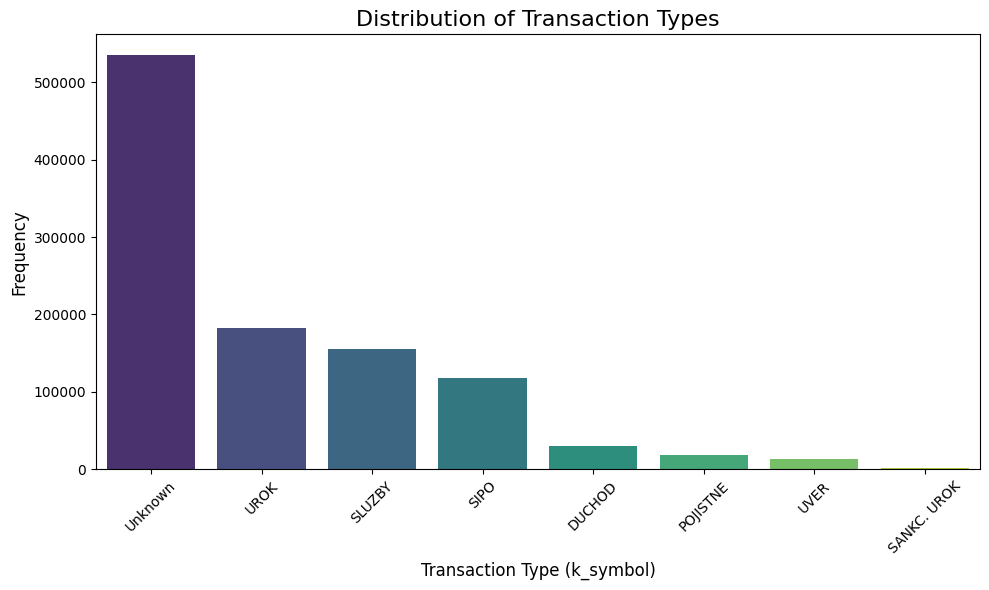

In [191]:
plt.figure(figsize=(10, 6))
sns.countplot(data=trans, x='k_symbol', order=trans['k_symbol'].value_counts().index, palette="viridis")

# Add titles and labels
plt.title("Distribution of Transaction Types", fontsize=16)
plt.xlabel("Transaction Type (k_symbol)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### iii. What are the top 5 accounts with the highest total transaction amounts?
	Hint:
Group the transactions by account_id, calculate the total amount for each account, and visualize the top 5 accounts using a bar plot.

	•	Tip: Use groupby() to calculate the total amounts and sns.barplot() for visualization.

In [192]:
total_trans= trans.groupby(['account_id']).size().reset_index(name='count')
total_trans 

,account_id,count
0,1,239
1,2,478
2,3,117
3,4,186
4,5,84
...,...,...
4495,11333,368
4496,11349,304
4497,11359,378
4498,11362,344


C:\Users\USER\AppData\Local\Temp\ipykernel_9676\944725390.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_accounts, x='account_id', y='count', palette="Blues_d")


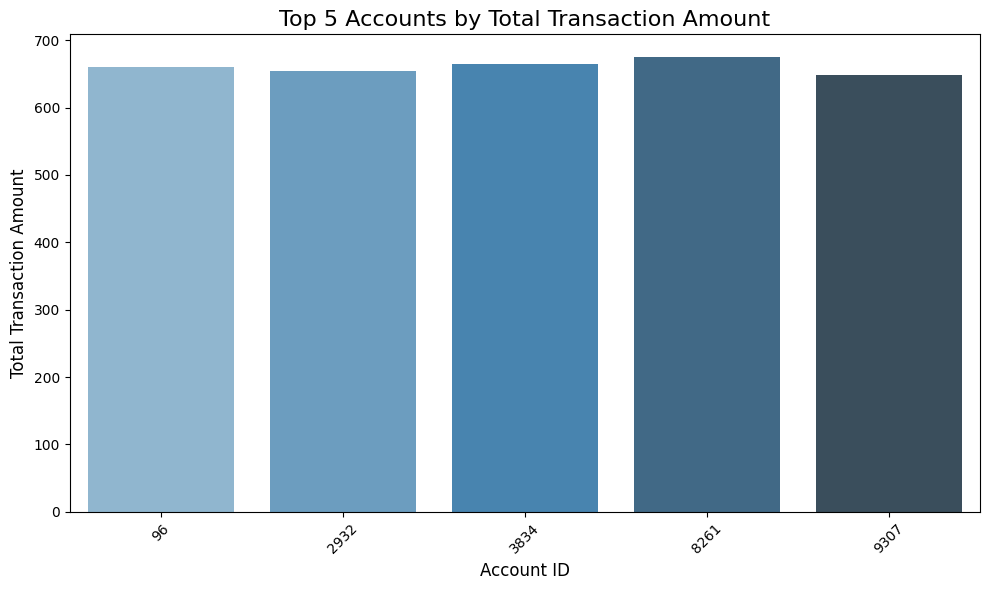

In [196]:

total_trans = trans.groupby(['account_id']).size().reset_index(name='count')

# Sort by total amount in descending order and select the top 5 accounts
top_5_accounts = total_trans.sort_values(by='count', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_accounts, x='account_id', y='count', palette="Blues_d")


plt.title("Top 5 Accounts by Total Transaction Amount", fontsize=16)
plt.xlabel("Account ID", fontsize=12)
plt.ylabel("Total Transaction Amount", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## 3- (Merging- Data Cleaning)
### Merge the entire Data , keeping in mind that all observations in the loan table are important as these are the people who applied for loans

In [36]:
conn = sqlite3.connect('Banking_data.db')

account = pd.read_sql_query("SELECT * FROM account", conn)
card = pd.read_sql_query("SELECT * FROM card", conn)
client = pd.read_sql_query("SELECT * FROM client", conn)
district = pd.read_sql_query("SELECT * FROM district", conn)
loan = pd.read_sql_query("SELECT * FROM loan", conn)
orders = pd.read_sql_query("SELECT * FROM orders", conn)
relationship = pd.read_sql_query("SELECT * FROM relationship", conn)
transaction = pd.read_sql_query("SELECT * FROM transactions", conn)


bank_data = account.copy()  
bank_data = pd.merge(bank_data, card, how='left', left_on="account_id", right_on='card_id')
bank_data = pd.merge(bank_data, client, how='left', left_on='district_id', right_on='client_id')
bank_data = pd.merge(bank_data, district, how='left', left_on='client_id', right_on='A16')
bank_data = pd.merge(bank_data, loan, left_on='loan_id', right_on='status')
bank_data = pd.merge(bank_data, orders, how='left', left_on='order_id', right_on='k_symbol')
bank_data = pd.merge(bank_data, relationship, how='left', left_on='disp_id', right_on='type')
bank_data = pd.merge(bank_data, transactions, how='left', left_on='trans_id', right_on='account')



print(bank_data.head())



KeyError: 'loan_id'

#### i. Preprocess the data and handle any missing values after merging

In [ ]:
#Your Code Here

#### ii. (Optional) Check for the outliers and anomalies

In [ ]:
#Your Code Here

#### iii. (Optional) Check the variables A15 and A16 in the district table, do you see any unsual thing?

In [ ]:
#Your Code Here

#### iv. (Optional) Convert all polish column names to english according to the data dictionary. For example, change 'POPLATEK MESICNE' to 'MONTHLY'.
Hint:
- Use SQL CASE statement in Pandas SQL

In [ ]:
#Your Code Here

#### v. (Optional) Handle Transaction Table as a single user may have multiple transactions, Try to create high level feature.

In [ ]:
#Your Code Here

# PART 3: Machine Learning

In this section, you will prepare the dataset for machine learning and implement either supervised or unsupervised learning.

---

## Step 1: Data Preparation

### 1.1 Handle Missing Values
- Check the dataset for missing values.
- If any are found, explain how you handle them (e.g., filling with median or dropping rows).
- Implement your solution for missing values.


### 1.4 Split the Data
- For supervised learning:
  - Separate the data into features (`X`) and the target variable (`y`).
  - Perform a train-test split (e.g., 80% for training, 20% for testing).
- For unsupervised learning:
  - Use all features for clustering (no target variable needed).

---

## Step 2: Option 1: Supervised Learning (Loan Default Detection)

### 2.1.1 Train Two Models
- Train two supervised learning models. You may choose from:
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - Neural Network
- Use appropriate hyperparameters or defaults for simplicity.
### Hint

- You may use the **loan status column** as the target variable.
- Convert the loan status into a **binary variable**:
  - If the loan status is `A` or `C`, label it as **Non-Defaulter** (0).
  - If the loan status is `B` or `D`, label it as **Defaulter** (1).
- You can achieve this using a mapping dictionary in pandas, such as:

```python
# Example code snippet for converting loan status
loan_status_mapping = {'A': 0, 'C': 0, 'B': 1, 'D': 1}
df['loan_status_binary'] = df['loan_status'].map(loan_status_mapping)


### 2.1.2 Evaluate the Models
- Evaluate each model using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1-Score
  - ROC-AUC (if applicable)



### 2.1.3 Plot a Confusion Matrix
- Plot a confusion matrix for the best-performing model.
- Interpret the results (e.g., which types of errors are most common?).




### 2.1.4 Compare the Models
- Compare the performance of the two models.
- Explain which model performs better and why.

In [ ]:
# Your Code Here


## Step 2: Option 2: Unsupervised Learning (Client Clustering)

### 2.2.1 Determine the Optimal Number of Clusters
- Use the **Elbow Method** to find the optimal number of clusters.
- Plot the within-cluster sum of squares (WCSS) for cluster counts from 1 to 10.
- Decide on the optimal number of clusters based on the plot.

### 2.2.2 Perform Clustering
- Implement K-Means clustering (or another clustering algorithm) with the optimal number of clusters.
- Assign each client to a cluster and add the cluster labels to the dataset.

### 2.2.3 Evaluate the Clusters
- Calculate the **Silhouette Score** for the clusters.
- Visualize the clusters using a scatter plot.


### 2.2.4 Analyze the Clusters
- Analyze the characteristics of each cluster:
  - What insights do the clusters provide about the clients?
  - Are there any actionable recommendations for the bank?

---

In [ ]:
# Your Code Here
